In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import time
import sympy as sp

In [2]:
# trajectory generator

class TrajectoryGenerator():
    def __init__(self, bcs, seg_time):
        self.tf = seg_time
        self.bcs = bcs
        self.N = 2*len(bcs)-1


        self.trajs = []
        self.t = []

        # self.getPosTrajectory()

    def updateTrajectory(self, dt):
        start = time.time()

        self.trajs = []
        
        t= sp.Symbol("t", real=True)
        T = sp.Symbol("T", real=True)

        coeffs = []

        for i in range(self.N+1):
            
            k = sp.Symbol("C_"+str(i), real=True)

            coeffs.append(k)

            if i==0:
                xt = k*(t**i)
            else:
                xt += k*(t**i)

        eqs = []

        for i in range(len(self.bcs)):
            eqs.append(sp.Eq(sp.diff(xt, t, i).subs(t,0.0), self.bcs[i][0]))
            eqs.append(sp.Eq(sp.diff(xt, t, i).subs(t,T), self.bcs[i][1]))


        sol = sp.solve(tuple(eqs), tuple(coeffs))
        end = time.time()
        
        print("Trajectory generation took "+str(end-start)+" secs")

        # st = sp.diff(xt.subs(sol),t,self.N-3)
        # jt = sp.diff(xt.subs(sol),t,self.N-4)
        # at = sp.diff(xt.subs(sol),t,self.N-5)
        
        # j_z = sp.solve(jt,t)
        # print(j_z)

        # print(at.subs(t, j_z[2]))
    
        xt = xt.subs(sol).subs(T, self.tf)

        self.t = list(np.arange(0,self.tf, dt))

        for i in range(len(self.bcs)+1):
            self.trajs.append([sp.diff(xt,t,i).subs(t, ti) for ti in self.t])
        





Trajectory generation took 0.11066937446594238 secs


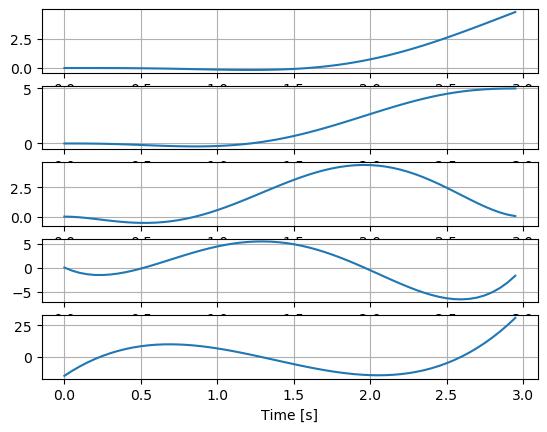

In [3]:
# Plotting
wps = [ [0.0, 0.0],
        [5.0, 10.0],
        [15.0, 0.0]]


bcs = [[0,5],
       [0,5],
       [0,0],
       [0,0]]

# bcs = [[0,5],
#        [5.0,0]]

# bcs = [[0,5],
#        [0,0],
#        [0,0]]

tf = 3.0
obj = TrajectoryGenerator(bcs, tf)
obj.updateTrajectory(0.05)
#plotting
N = len(obj.trajs)

for i in range(N):
    plt.subplot(len(obj.trajs), 1, i+1)
    plt.plot(obj.t, obj.trajs[i])
    plt.grid()
plt.xlabel("Time [s]")
plt.show()